Lefki Ioanna (Eleanna) Panagiotou 

ID: 908 589 7206

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [35]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [36]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [37]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [38]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [39]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [40]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [41]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

### Question 1a

118it [00:09, 12.04it/s]                         


Epoch 1 of 100
Generator loss: 2.27061439, Discriminator loss: 1.21647990


118it [00:10, 11.51it/s]                         


Epoch 2 of 100
Generator loss: 4.34261227, Discriminator loss: 0.50386083


118it [00:10, 11.60it/s]                         


Epoch 3 of 100
Generator loss: 2.63457060, Discriminator loss: 0.79344505


118it [00:10, 11.46it/s]                         


Epoch 4 of 100
Generator loss: 2.69940686, Discriminator loss: 0.83430380


118it [00:10, 11.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


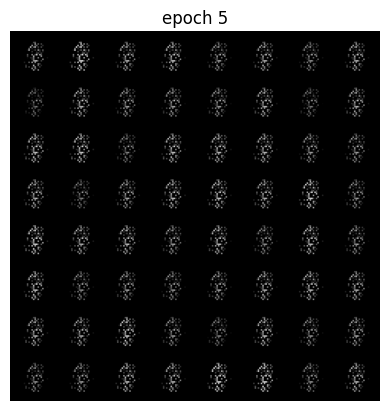

Epoch 5 of 100
Generator loss: 3.63847089, Discriminator loss: 1.08730495


118it [00:10, 11.34it/s]                         


Epoch 6 of 100
Generator loss: 2.37248778, Discriminator loss: 1.18578076


118it [00:10, 11.41it/s]                         


Epoch 7 of 100
Generator loss: 1.70775318, Discriminator loss: 0.99130499


118it [00:10, 11.46it/s]                         


Epoch 8 of 100
Generator loss: 1.74645758, Discriminator loss: 0.97930294


118it [00:10, 11.23it/s]                         


Epoch 9 of 100
Generator loss: 2.04075718, Discriminator loss: 1.37506676


118it [00:10, 11.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


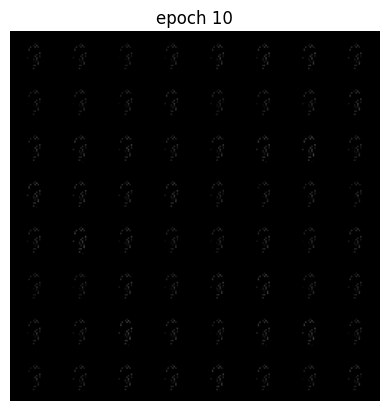

Epoch 10 of 100
Generator loss: 1.05116534, Discriminator loss: 1.07818389


118it [00:10, 11.37it/s]                         


Epoch 11 of 100
Generator loss: 1.08064318, Discriminator loss: 1.00081301


118it [00:10, 11.15it/s]                         


Epoch 12 of 100
Generator loss: 2.38341713, Discriminator loss: 0.70633042


118it [00:10, 11.42it/s]                         


Epoch 13 of 100
Generator loss: 2.48085332, Discriminator loss: 0.57114261


118it [00:10, 11.52it/s]                         


Epoch 14 of 100
Generator loss: 2.99164343, Discriminator loss: 0.55483294


118it [00:10, 11.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


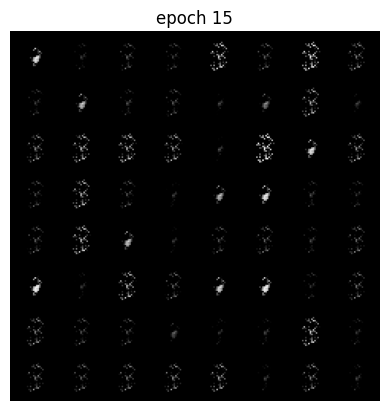

Epoch 15 of 100
Generator loss: 3.21095276, Discriminator loss: 0.51687390


118it [00:10, 11.58it/s]                         


Epoch 16 of 100
Generator loss: 2.74542761, Discriminator loss: 0.47245222


118it [00:10, 11.38it/s]                         


Epoch 17 of 100
Generator loss: 3.15907049, Discriminator loss: 0.49251294


118it [00:10, 11.47it/s]                         


Epoch 18 of 100
Generator loss: 3.73283625, Discriminator loss: 0.36280107


118it [00:10, 11.66it/s]                         


Epoch 19 of 100
Generator loss: 3.21308517, Discriminator loss: 0.56381255


118it [00:10, 11.22it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


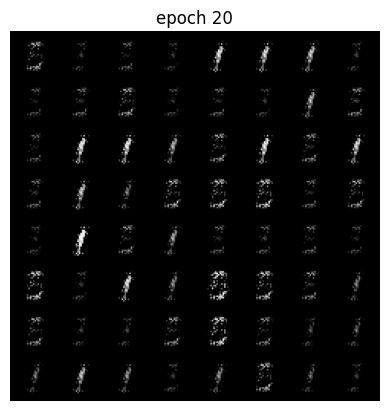

Epoch 20 of 100
Generator loss: 3.03534722, Discriminator loss: 0.46609375


118it [00:10, 11.25it/s]                         


Epoch 21 of 100
Generator loss: 2.96920776, Discriminator loss: 0.53514677


118it [00:10, 11.44it/s]                         


Epoch 22 of 100
Generator loss: 3.23879051, Discriminator loss: 0.46849251


118it [00:10, 11.48it/s]                         


Epoch 23 of 100
Generator loss: 3.13521409, Discriminator loss: 0.50961518


118it [00:10, 11.62it/s]                         


Epoch 24 of 100
Generator loss: 2.96939015, Discriminator loss: 0.42094621


118it [00:10, 11.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


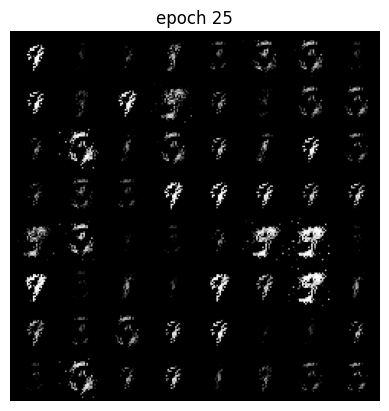

Epoch 25 of 100
Generator loss: 2.69214129, Discriminator loss: 0.56309050


118it [00:10, 11.63it/s]                         


Epoch 26 of 100
Generator loss: 2.71729684, Discriminator loss: 0.50736743


118it [00:10, 11.39it/s]                         


Epoch 27 of 100
Generator loss: 3.10617447, Discriminator loss: 0.43564433


118it [00:10, 11.54it/s]                         


Epoch 28 of 100
Generator loss: 3.12700605, Discriminator loss: 0.44806024


118it [00:10, 11.64it/s]                         


Epoch 29 of 100
Generator loss: 3.22771811, Discriminator loss: 0.50668836


118it [00:10, 11.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


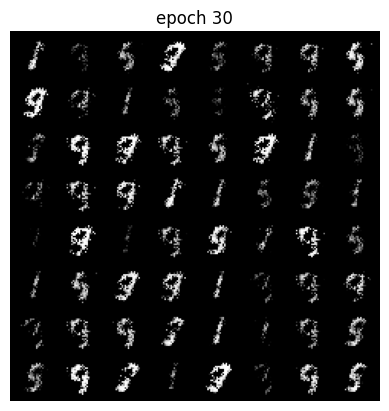

Epoch 30 of 100
Generator loss: 3.24482584, Discriminator loss: 0.38803846


118it [00:10, 11.41it/s]                         


Epoch 31 of 100
Generator loss: 2.95018244, Discriminator loss: 0.63151062


118it [00:10, 11.51it/s]                         


Epoch 32 of 100
Generator loss: 3.26937389, Discriminator loss: 0.45798039


118it [00:10, 11.48it/s]                         


Epoch 33 of 100
Generator loss: 3.06954694, Discriminator loss: 0.49504721


118it [00:10, 11.21it/s]                         


Epoch 34 of 100
Generator loss: 2.47064424, Discriminator loss: 0.63336819


118it [00:10, 11.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


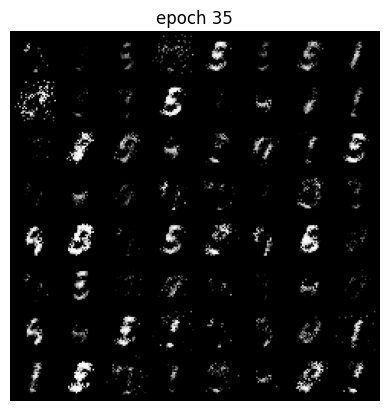

Epoch 35 of 100
Generator loss: 2.80008817, Discriminator loss: 0.50264376


118it [00:10, 11.26it/s]                         


Epoch 36 of 100
Generator loss: 3.18902302, Discriminator loss: 0.46216828


118it [00:10, 11.35it/s]                         


Epoch 37 of 100
Generator loss: 3.20659304, Discriminator loss: 0.48497587


118it [00:10, 11.50it/s]                         


Epoch 38 of 100
Generator loss: 2.81316376, Discriminator loss: 0.62380475


118it [00:10, 11.35it/s]                         


Epoch 39 of 100
Generator loss: 2.81826901, Discriminator loss: 0.49336672


118it [00:10, 11.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


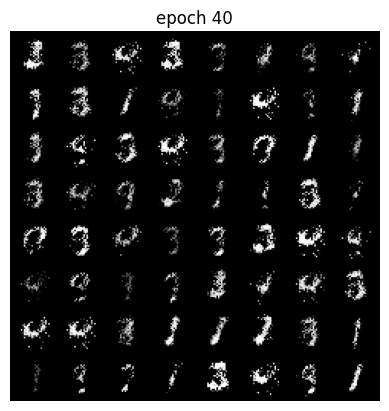

Epoch 40 of 100
Generator loss: 2.71305037, Discriminator loss: 0.58647907


118it [00:10, 11.10it/s]                         


Epoch 41 of 100
Generator loss: 2.93726730, Discriminator loss: 0.59756368


118it [00:10, 10.98it/s]                         


Epoch 42 of 100
Generator loss: 2.87703824, Discriminator loss: 0.52365357


118it [00:10, 10.90it/s]                         


Epoch 43 of 100
Generator loss: 3.03764153, Discriminator loss: 0.46392301


118it [00:10, 11.20it/s]                         


Epoch 44 of 100
Generator loss: 2.90301752, Discriminator loss: 0.51368082


118it [00:10, 11.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


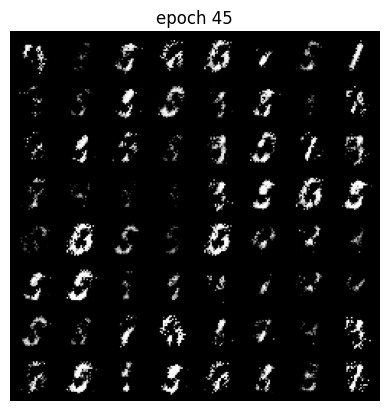

Epoch 45 of 100
Generator loss: 2.75797963, Discriminator loss: 0.57647979


118it [00:10, 11.08it/s]                         


Epoch 46 of 100
Generator loss: 2.47072124, Discriminator loss: 0.69280577


118it [00:10, 11.17it/s]                         


Epoch 47 of 100
Generator loss: 2.85303020, Discriminator loss: 0.51270503


118it [00:10, 11.40it/s]                         


Epoch 48 of 100
Generator loss: 3.04272127, Discriminator loss: 0.50473505


118it [00:10, 11.26it/s]                         


Epoch 49 of 100
Generator loss: 2.95157361, Discriminator loss: 0.48276851


118it [00:10, 11.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


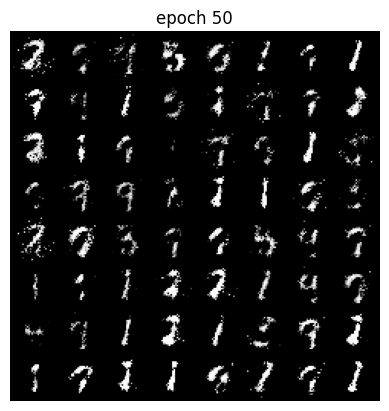

Epoch 50 of 100
Generator loss: 3.03831983, Discriminator loss: 0.48620090


118it [00:10, 11.27it/s]                         


Epoch 51 of 100
Generator loss: 3.05195808, Discriminator loss: 0.48854747


118it [00:10, 11.72it/s]                         


Epoch 52 of 100
Generator loss: 3.08121395, Discriminator loss: 0.47777745


118it [00:10, 11.15it/s]                         


Epoch 53 of 100
Generator loss: 3.03315663, Discriminator loss: 0.47312662


118it [00:10, 11.43it/s]                         


Epoch 54 of 100
Generator loss: 3.01149035, Discriminator loss: 0.42847702


118it [00:10, 11.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


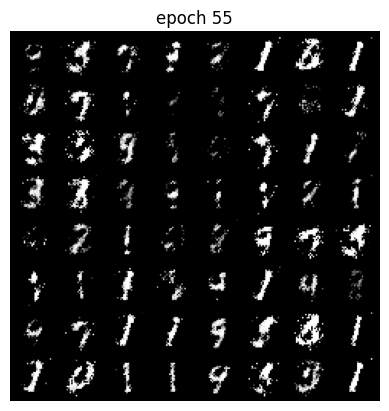

Epoch 55 of 100
Generator loss: 3.12308598, Discriminator loss: 0.50227702


118it [00:10, 11.49it/s]                         


Epoch 56 of 100
Generator loss: 2.95838833, Discriminator loss: 0.50496519


118it [00:10, 11.55it/s]                         


Epoch 57 of 100
Generator loss: 3.05739093, Discriminator loss: 0.48674503


118it [00:10, 11.49it/s]                         


Epoch 58 of 100
Generator loss: 3.15438151, Discriminator loss: 0.56846362


118it [00:10, 11.14it/s]                         


Epoch 59 of 100
Generator loss: 2.98573494, Discriminator loss: 0.51399285


118it [00:10, 11.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


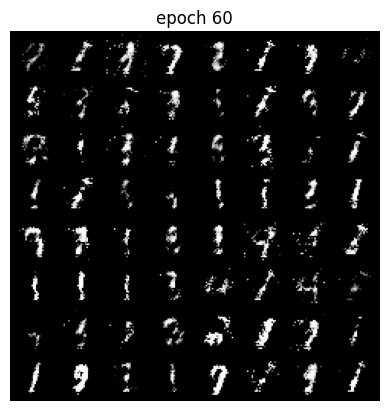

Epoch 60 of 100
Generator loss: 3.02573752, Discriminator loss: 0.49731338


118it [00:10, 11.52it/s]                         


Epoch 61 of 100
Generator loss: 2.93361330, Discriminator loss: 0.54389316


118it [00:10, 11.55it/s]                         


Epoch 62 of 100
Generator loss: 2.71699333, Discriminator loss: 0.58014947


118it [00:10, 11.35it/s]                         


Epoch 63 of 100
Generator loss: 2.68793106, Discriminator loss: 0.53708029


118it [00:10, 11.56it/s]                         


Epoch 64 of 100
Generator loss: 2.97544575, Discriminator loss: 0.49513319


118it [00:10, 11.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


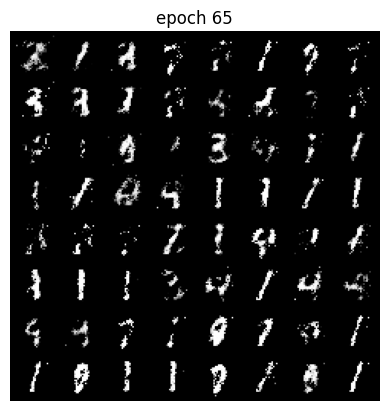

Epoch 65 of 100
Generator loss: 2.96340680, Discriminator loss: 0.52079785


118it [00:10, 11.38it/s]                         


Epoch 66 of 100
Generator loss: 2.82139397, Discriminator loss: 0.53801841


118it [00:10, 10.81it/s]                         


Epoch 67 of 100
Generator loss: 2.68152833, Discriminator loss: 0.56788379


118it [00:10, 11.11it/s]                         


Epoch 68 of 100
Generator loss: 2.68432927, Discriminator loss: 0.55158681


118it [00:10, 10.73it/s]                         


Epoch 69 of 100
Generator loss: 2.50256038, Discriminator loss: 0.57533801


118it [00:10, 10.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


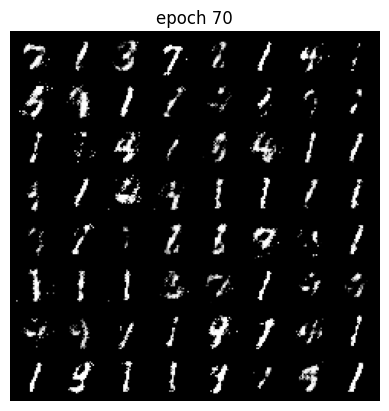

Epoch 70 of 100
Generator loss: 2.53713751, Discriminator loss: 0.59976387


118it [00:10, 11.09it/s]                         


Epoch 71 of 100
Generator loss: 2.52698779, Discriminator loss: 0.57126188


118it [00:10, 10.87it/s]                         


Epoch 72 of 100
Generator loss: 2.50932431, Discriminator loss: 0.61074704


118it [00:10, 11.35it/s]                         


Epoch 73 of 100
Generator loss: 2.51594305, Discriminator loss: 0.62413031


118it [00:10, 11.05it/s]                         


Epoch 74 of 100
Generator loss: 2.32157683, Discriminator loss: 0.63410366


118it [00:10, 11.08it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


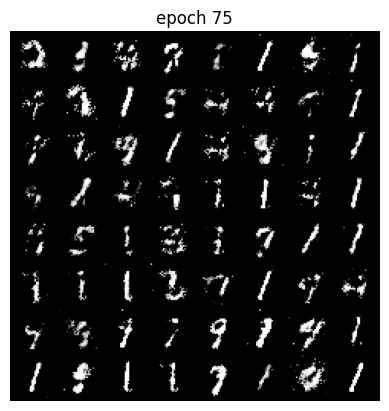

Epoch 75 of 100
Generator loss: 2.32964253, Discriminator loss: 0.63696998


118it [00:10, 11.02it/s]                         


Epoch 76 of 100
Generator loss: 2.18072128, Discriminator loss: 0.66417152


118it [00:10, 10.75it/s]                         


Epoch 77 of 100
Generator loss: 2.28687477, Discriminator loss: 0.64169854


118it [00:10, 11.27it/s]                         


Epoch 78 of 100
Generator loss: 2.19202399, Discriminator loss: 0.69017321


118it [00:10, 11.38it/s]                         


Epoch 79 of 100
Generator loss: 2.26526618, Discriminator loss: 0.67568737


118it [00:10, 11.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


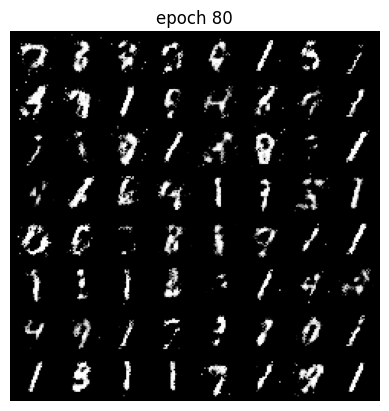

Epoch 80 of 100
Generator loss: 2.23350835, Discriminator loss: 0.68272567


118it [00:10, 11.07it/s]                         


Epoch 81 of 100
Generator loss: 2.21692348, Discriminator loss: 0.67864037


118it [00:10, 10.91it/s]                         


Epoch 82 of 100
Generator loss: 2.27830005, Discriminator loss: 0.66916370


118it [00:10, 11.25it/s]                         


Epoch 83 of 100
Generator loss: 2.25079155, Discriminator loss: 0.67349082


118it [00:10, 11.30it/s]                         


Epoch 84 of 100
Generator loss: 2.29589915, Discriminator loss: 0.70439172


118it [00:10, 11.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


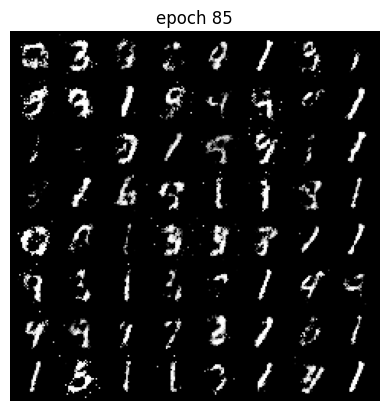

Epoch 85 of 100
Generator loss: 2.09914827, Discriminator loss: 0.74379414


118it [00:10, 11.48it/s]                         


Epoch 86 of 100
Generator loss: 2.11784554, Discriminator loss: 0.73386842


118it [00:10, 11.22it/s]                         


Epoch 87 of 100
Generator loss: 2.19945931, Discriminator loss: 0.73343068


118it [00:10, 11.15it/s]                         


Epoch 88 of 100
Generator loss: 2.06309414, Discriminator loss: 0.77479959


118it [00:10, 11.22it/s]                         


Epoch 89 of 100
Generator loss: 2.08386445, Discriminator loss: 0.73115021


118it [00:10, 11.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


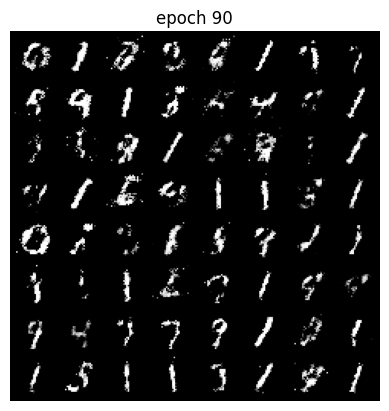

Epoch 90 of 100
Generator loss: 2.12084150, Discriminator loss: 0.73216087


118it [00:10, 11.17it/s]                         


Epoch 91 of 100
Generator loss: 2.15287471, Discriminator loss: 0.73496377


118it [00:10, 11.33it/s]                         


Epoch 92 of 100
Generator loss: 2.14023948, Discriminator loss: 0.70786566


118it [00:10, 11.08it/s]                         


Epoch 93 of 100
Generator loss: 2.15391135, Discriminator loss: 0.70770502


118it [00:10, 10.77it/s]                         


Epoch 94 of 100
Generator loss: 2.07645679, Discriminator loss: 0.74111903


118it [00:11, 10.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


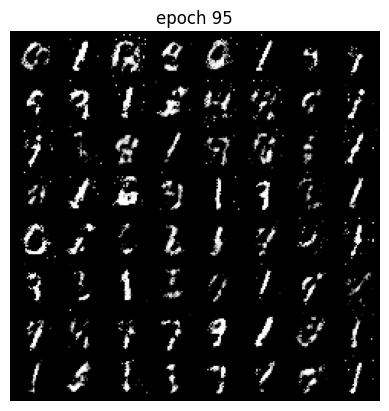

Epoch 95 of 100
Generator loss: 2.04828978, Discriminator loss: 0.73610067


118it [00:11, 10.68it/s]                         


Epoch 96 of 100
Generator loss: 2.02739120, Discriminator loss: 0.78108776


118it [00:10, 11.10it/s]                         


Epoch 97 of 100
Generator loss: 1.94236565, Discriminator loss: 0.80262107


118it [00:10, 11.38it/s]                         


Epoch 98 of 100
Generator loss: 1.98166811, Discriminator loss: 0.80317801


118it [00:10, 11.63it/s]                         


Epoch 99 of 100
Generator loss: 1.87680376, Discriminator loss: 0.79542184


118it [00:10, 11.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


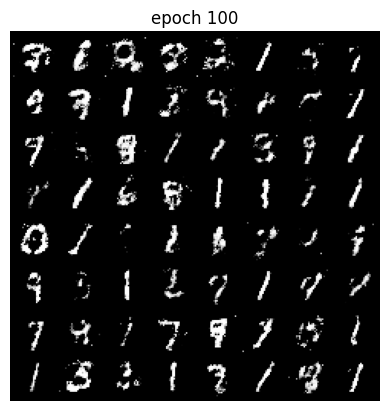

Epoch 100 of 100
Generator loss: 1.94909227, Discriminator loss: 0.76417160


In [21]:
torch.manual_seed(7777)

def discriminator_loss(output_real, output_fake):
    ############ YOUR CODE HERE ##########
    real_label = label_real(output_real.size(0))
    fake_label = label_fake(output_fake.size(0)) 

    loss_real = criterion(output_real, real_label)
    loss_fake = criterion(output_fake, fake_label)
    total_loss = loss_real + loss_fake

    return total_loss, loss_real, loss_fake
    ######################################
    
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
  
    loss = criterion(output, true_label)

    return loss 

    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)

        # k steps of discriminator
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            # train the discriminator network
            optim_d.zero_grad()

            output_real = discriminator(data_real)
            output_fake = discriminator(data_fake)
            total_loss, loss_real, loss_fake = discriminator_loss(output_real, output_fake)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()

            loss_d += total_loss

        data_fake = generator(create_noise(b_size, nz))
        # train the generator network
        optim_g.zero_grad()
        true_label = label_real(b_size)
        output_fake = discriminator(data_fake)
        loss = generator_loss(output_fake, true_label)
        loss_g += loss
        loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    # save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [22]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [23]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

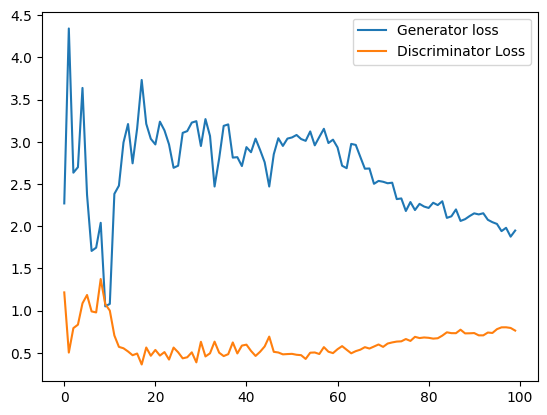

In [30]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(torch.tensor(losses_g).cpu().detach().numpy(), label='Generator loss')
plt.plot(torch.tensor(losses_d).cpu().detach().numpy(), label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

### Question 1b

118it [00:11, 10.49it/s]                         


Epoch 1 of 100
Generator loss: 0.05953342, Discriminator loss: 0.08345637


118it [00:09, 12.52it/s]                         


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.37it/s]                         


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.47it/s]                         


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


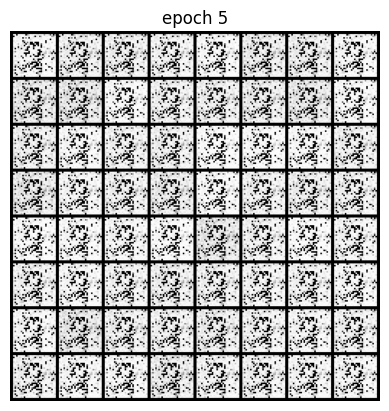

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.29it/s]                         


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.22it/s]                         


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.79it/s]                         


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.33it/s]                         


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


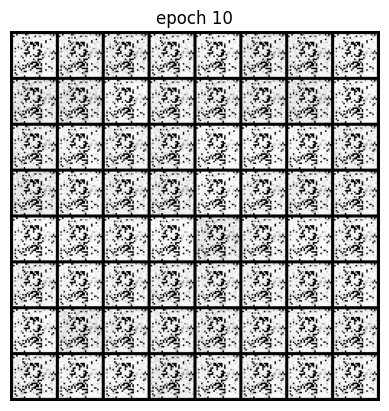

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.20it/s]                         


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.91it/s]                         


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.99it/s]                         


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.33it/s]                         


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


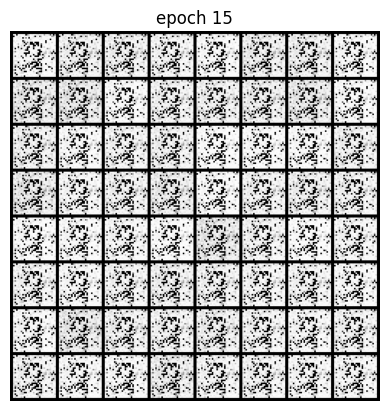

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.15it/s]                         


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.31it/s]                         


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.22it/s]                         


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.69it/s]                         


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


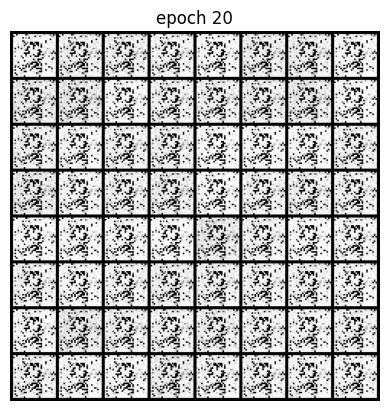

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.59it/s]                         


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.12it/s]                         


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.25it/s]                         


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.02it/s]                         


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.21it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


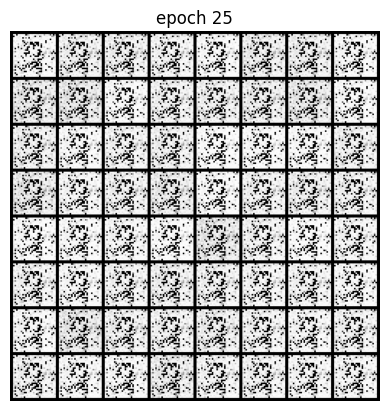

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.00it/s]                         


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.09it/s]                         


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.03it/s]                         


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.17it/s]                         


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


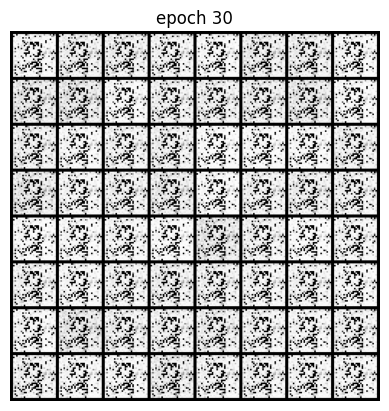

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.45it/s]                         


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.57it/s]                         


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.53it/s]                         


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.95it/s]                         


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


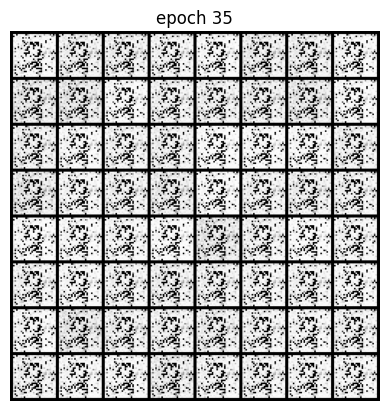

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.98it/s]                         


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.00it/s]                         


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.23it/s]                         


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.11it/s]                         


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.18it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


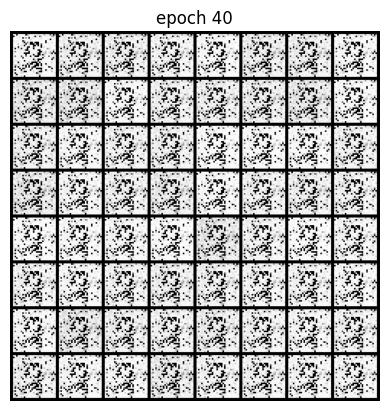

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.14it/s]                         


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.23it/s]                         


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.16it/s]                         


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.04it/s]                         


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


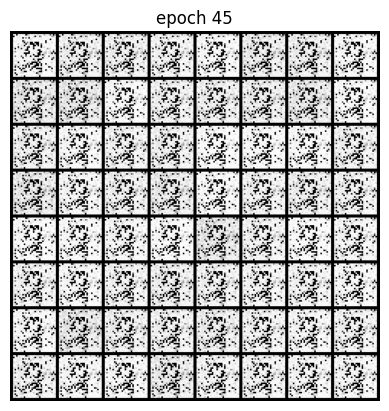

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.32it/s]                         


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.40it/s]                         


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.30it/s]                         


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.94it/s]                         


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


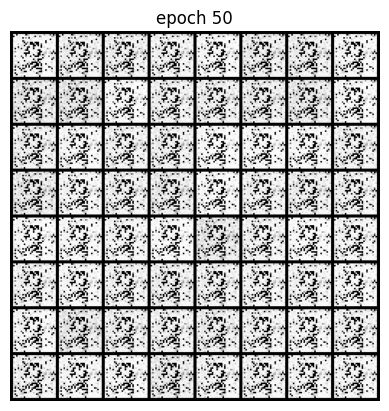

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.40it/s]                         


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.38it/s]                         


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.35it/s]                         


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.51it/s]                         


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


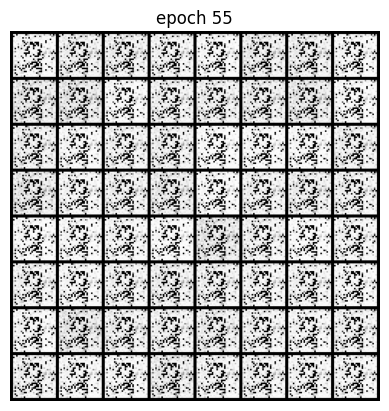

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.46it/s]                         


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.24it/s]                         


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.10it/s]                         


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.26it/s]                         


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


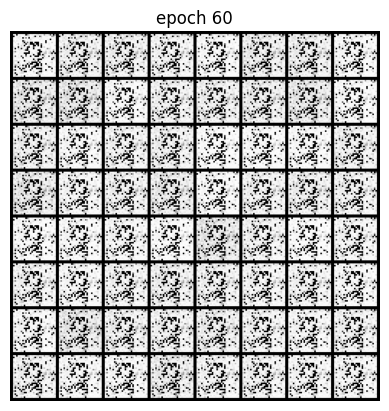

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.17it/s]                         


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.17it/s]                         


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.19it/s]                         


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.05it/s]                         


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


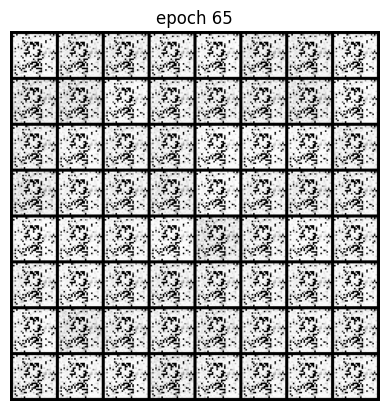

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.07it/s]                         


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.14it/s]                         


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.16it/s]                         


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.94it/s]                         


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


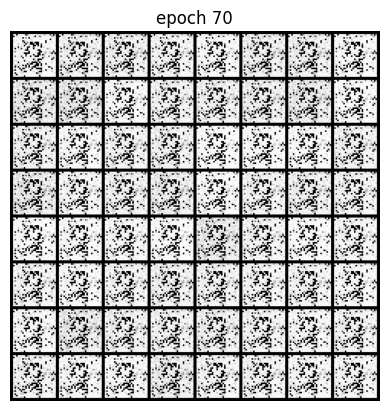

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.08it/s]                         


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.97it/s]                         


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.05it/s]                         


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.08it/s]                         


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


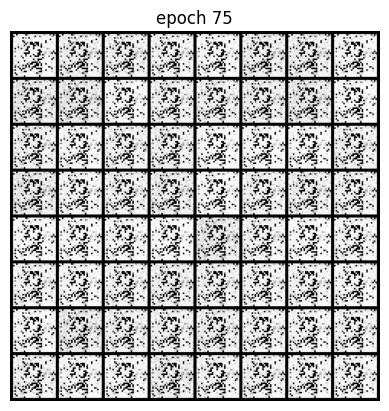

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.57it/s]                         


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.18it/s]                         


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.18it/s]                         


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.14it/s]                         


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


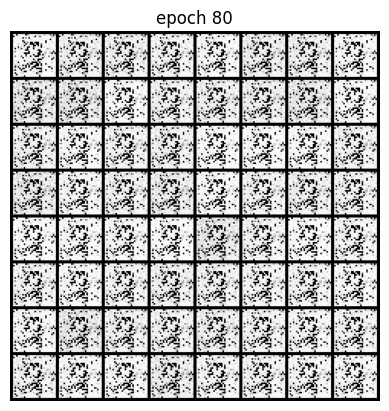

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.22it/s]                         


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.23it/s]                         


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.08it/s]                         


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.04it/s]                         


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.87it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


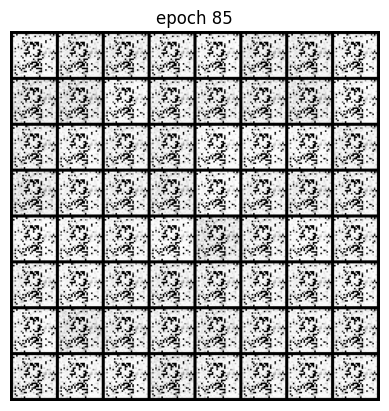

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.95it/s]                         


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.75it/s]                         


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.96it/s]                         


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.04it/s]                         


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


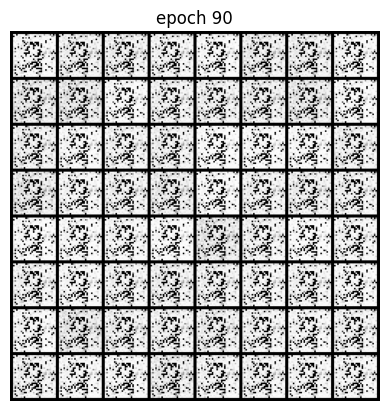

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.98it/s]                         


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.91it/s]                         


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.72it/s]                         


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.14it/s]                         


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


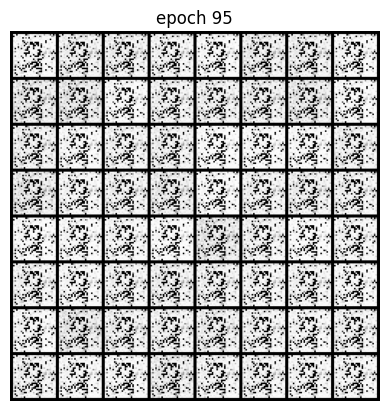

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 12.09it/s]                         


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.95it/s]                         


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:09, 11.80it/s]                         


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.59it/s]                         


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 11.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


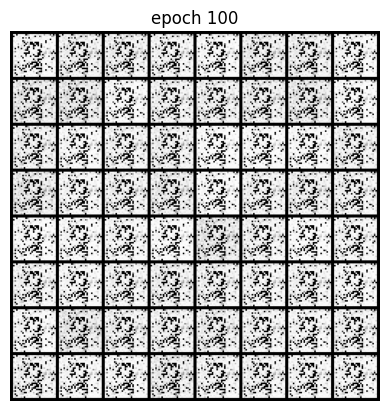

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [14]:
def discriminator_loss(output_real, output_fake):
    ############ YOUR CODE HERE ##########
    real_label = label_real(output_real.size(0))
    fake_label = label_fake(output_fake.size(0)) 

    loss_real = criterion(output_real, real_label)
    loss_fake = criterion(output_fake, fake_label)
    total_loss = loss_real + loss_fake

    return total_loss, loss_real, loss_fake
    ######################################
    
def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
  
    loss = criterion(output, true_label)

    return loss 

    ######################################

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        image, _ = data
        image = image.to(device)
        b_size = len(image)

        # k steps of discriminator
        for step in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            # train the discriminator network
            optim_d.zero_grad()

            output_real = discriminator(data_real)
            output_fake = discriminator(data_fake)
            total_loss, loss_real, loss_fake = discriminator_loss(output_real, output_fake)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()

            loss_d += total_loss

        data_fake = generator(create_noise(b_size, nz))
        # train the generator network
        optim_g.zero_grad()
        true_label = label_fake(b_size)
        output_fake = discriminator(data_fake)
        loss = generator_loss(output_fake, true_label)
        loss_g += loss
        loss.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        save_generator_image(generated_img, f"outputs_1/gen_img{epoch+1}.png")
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_1/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

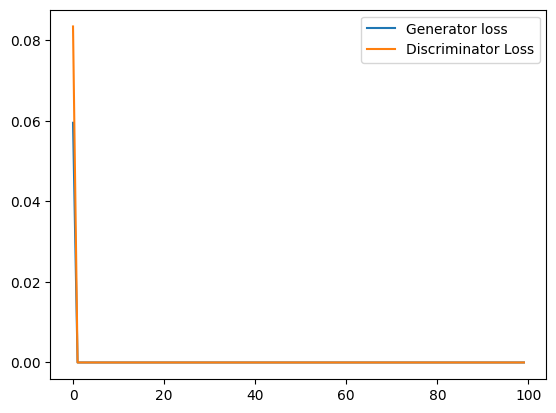

In [15]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_1/generator_images.gif', imgs)
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(torch.tensor(losses_g).cpu().detach().numpy(), label='Generator loss')
plt.plot(torch.tensor(losses_d).cpu().detach().numpy(), label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_1/loss.png')